In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
# Get our labels
labels = train['label'].values

In [6]:
# view the unique labels
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

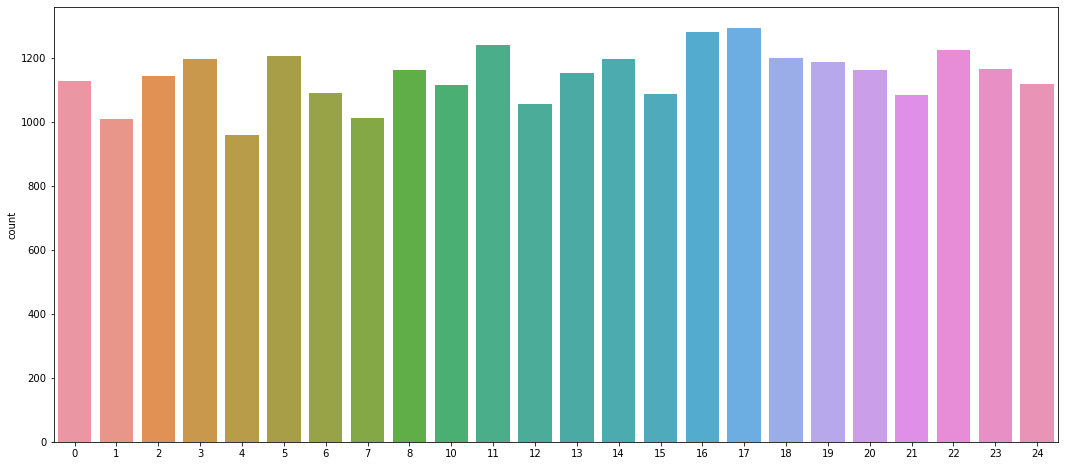

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [8]:
# drop training labels from our training data so we can seperate it
train.drop('label', axis = 1, inplace=True)

In [9]:
# Extract the image data from each row in our csv
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
# encode our labels
from sklearn.preprocessing import LabelBinarizer

In [11]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [12]:
# view our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


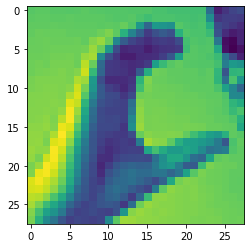

In [13]:
# inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

In [14]:
# split our  data into x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [16]:
# scale our images
x_train = x_train / 255
x_test = x_test / 255

In [17]:
# Reshape them into the size required by TF and keras

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

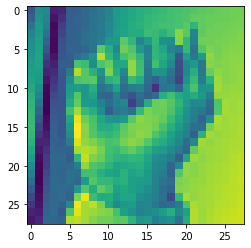

In [18]:
plt.imshow(x_train[0].reshape(28,28))

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [22]:
datagen.fit(x_train)

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [25]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)      

In [26]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
151/151 [==============================] - 39s 245ms/step - loss: 1.3261 - accuracy: 0.5889 - val_loss: 3.6570 - val_accuracy: 0.0764 - lr: 0.0010
Epoch 2/20
151/151 [==============================] - 44s 289ms/step - loss: 0.3274 - accuracy: 0.8921 - val_loss: 2.9631 - val_accuracy: 0.2525 - lr: 0.0010
Epoch 3/20
151/151 [==============================] - 48s 319ms/step - loss: 0.1569 - accuracy: 0.9489 - val_loss: 0.4776 - val_accuracy: 0.8648 - lr: 0.0010
Epoch 4/20
151/151 [==============================] - 45s 299ms/step - loss: 0.0982 - accuracy: 0.9688 - val_loss: 0.0521 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 5/20
151/151 [==============================] - 48s 319ms/step - loss: 0.0710 - accuracy: 0.9776 - val_loss: 0.0302 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 6/20
151/151 [==============================] - 41s 272ms/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.5493 - val_accuracy: 0.8276 - lr: 0.0010
Epoch 7/20
151/151 [==============================] 

In [27]:
model.save('smnist.h5')

In [29]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time
import pandas as pd

In [30]:
model = load_model('smnist.h5')

In [31]:
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils
cap = cv2.VideoCapture(0)

In [32]:
_, frame = cap.read()

In [33]:
h, w, c = frame.shape

In [34]:
h, w, c = frame.shape
img_counter = 0
analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [ ]:
while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        analysisframe = frame
        showframe = analysisframe
        cv2.imshow("Frame", showframe)
        framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
        resultanalysis = hands.process(framergbanalysis)
        hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
        if hand_landmarksanalysis:
            for handLMsanalysis in hand_landmarksanalysis:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lmanalysis in handLMsanalysis.landmark:
                    x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                y_min -= 20
                y_max += 20
                x_min -= 20
                x_max += 20 

        analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
        analysisframe = analysisframe[y_min:y_max, x_min:x_max]
        analysisframe = cv2.resize(analysisframe,(28,28))


        nlist = []
        rows,cols = analysisframe.shape
        for i in range(rows):
            for j in range(cols):
                k = analysisframe[i,j]
                nlist.append(k)
        
        datan = pd.DataFrame(nlist).T
        colname = []
        for val in range(784):
            colname.append(val)
        datan.columns = colname

        pixeldata = datan.values
        pixeldata = pixeldata / 255
        pixeldata = pixeldata.reshape(-1,28,28,1)
        prediction = model.predict(pixeldata)
        predarray = np.array(prediction[0])
        letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
        predarrayordered = sorted(predarray, reverse=True)
        high1 = predarrayordered[0]
        high2 = predarrayordered[1]
        high3 = predarrayordered[2]
        for key,value in letter_prediction_dict.items():
            if value==high1:
                print("Predicted Character 1: ", key)
                print('Confidence 1: ', 100*value)
            elif value==high2:
                print("Predicted Character 2: ", key)
                print('Confidence 2: ', 100*value)
            elif value==high3:
                print("Predicted Character 3: ", key)
                print('Confidence 3: ', 100*value)
        time.sleep(5)

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 122ms/step
Predicted Character 2:  A
Confidence 2:  38.41143846511841
Predicted Character 1:  N
Confidence 1:  59.747982025146484
Predicted Character 3:  Y
Confidence 3:  1.4682037755846977
1/1 [==============================] - 0s 19ms/step
Predicted Character 1:  F
Confidence 1:  50.244730710983276
Predicted Character 2:  N
Confidence 2:  33.03869664669037
Predicted Character 3:  W
Confidence 3:  10.061795264482498
1/1 [==============================] - 0s 18ms/step
Predicted Character 2:  A
Confidence 2:  1.2296727858483791
Predicted Character 1:  P
Confidence 1:  96.83223962783813
Predicted Character 3:  Q
Confidence 3:  1.1606932617723942
